In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('./data/data.csv')

In [4]:
df.dtypes

Unnamed: 0                       int64
encounter_id                     int64
hospital_id                      int64
age                            float64
bmi                            float64
                                ...   
immunosuppression                int64
leukemia                         int64
lymphoma                         int64
solid_tumor_with_metastasis      int64
diabetes_mellitus                int64
Length: 181, dtype: object

In [5]:
column_list = df.columns
column_list

Index(['Unnamed: 0', 'encounter_id', 'hospital_id', 'age', 'bmi',
       'elective_surgery', 'ethnicity', 'gender', 'height',
       'hospital_admit_source',
       ...
       'h1_pao2fio2ratio_max', 'h1_pao2fio2ratio_min', 'aids', 'cirrhosis',
       'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'diabetes_mellitus'],
      dtype='object', length=181)

In [6]:
cont_var = []
cat_var = []
def type_groups(df):
    for column in df.columns:
        if df[column].dtype == 'int64' or df[column].dtype == 'float64':
            cont_var.append(column)
        elif df[column].dtype == 'object':
            cat_var.append(column)
        else:
            pass
    return

In [7]:
type_groups(df)

In [8]:
print(len(cont_var))
print(len(cat_var))

175
6


In [9]:
df_cont = df.loc[:,cont_var]

In [10]:
df_cont['diabetes_mellitus'].value_counts()

0    102006
1     28151
Name: diabetes_mellitus, dtype: int64

In [12]:
df_cont.drop(['Unnamed: 0','encounter_id'],axis=1,inplace=True)

In [13]:
num_na = []
col_list = []
for column in df_cont.columns:
    col_list.append(column)
    num_na.append(round(df_cont[column].isna().sum()/df_cont.shape[0]*100,2))

zipped = list(zip(col_list,num_na))
zorted = sorted(zipped,key=lambda x:x[1],reverse=True)

zorted_cols = [col[0] for col in zorted]

In [88]:
zorted_vals = [[val[1]] for val in zorted]
zorted_feats = [[feat[0]]for feat in zorted]

In [103]:
nans_ = pd.DataFrame(zorted_vals,columns=['percent_na'])
feats_ = pd.DataFrame(zorted_feats,columns=['features'])
nans = feats_.merge(nans_,left_index=True,right_index=True)
nans

,features,percent_na
0,h1_bilirubin_max,92.09
1,h1_bilirubin_min,92.09
2,h1_albumin_max,91.43
3,h1_albumin_min,91.43
4,h1_lactate_max,91.02
...,...,...
168,immunosuppression,0.00
169,leukemia,0.00
170,lymphoma,0.00
171,solid_tumor_with_metastasis,0.00


In [93]:
corr_ = df_zort.corr()[['diabetes_mellitus']].reset_index()
corr_

,index,diabetes_mellitus
0,h1_bilirubin_max,-0.034426
1,h1_bilirubin_min,-0.034341
2,h1_albumin_max,-0.011122
3,h1_albumin_min,-0.010990
4,h1_lactate_max,0.001297
...,...,...
168,immunosuppression,-0.003022
169,leukemia,0.003574
170,lymphoma,-0.000253
171,solid_tumor_with_metastasis,-0.013190


In [104]:
corr_nans = nans.merge(corr_,left_on='features',right_on='index')

In [106]:
corr_nans.drop(columns='index',axis=1,inplace=True)

In [177]:
corr_sort = corr_nans.sort_values(['diabetes_mellitus'],ascending=False)
corr_sort_drop = corr_sort[corr_sort['percent_na'] < 60].copy()
#corr_sort_drop.drop(corr_sort_drop.iloc[106])
corr_sort.head(30)

,features,percent_na,diabetes_mellitus
172,diabetes_mellitus,0.00,1.000000
108,d1_glucose_max,6.33,0.400742
93,glucose_apache,11.29,0.354359
69,h1_glucose_max,57.68,0.316847
70,h1_glucose_min,57.68,0.304520
122,bmi,3.45,0.169043
127,weight,2.66,0.155517
94,d1_bun_max,10.55,0.146990
78,bun_apache,19.52,0.145241
95,d1_bun_min,10.55,0.137304


In [170]:
corr_sort_drop.drop(index=[160],inplace=True)

In [174]:
corr_sort_drop.head(30)

,features,percent_na,diabetes_mellitus
172,diabetes_mellitus,0.00,1.000000
108,d1_glucose_max,6.33,0.400742
93,glucose_apache,11.29,0.354359
69,h1_glucose_max,57.68,0.316847
70,h1_glucose_min,57.68,0.304520
122,bmi,3.45,0.169043
127,weight,2.66,0.155517
94,d1_bun_max,10.55,0.146990
78,bun_apache,19.52,0.145241
95,d1_bun_min,10.55,0.137304


In [183]:
feat_list = list(corr_sort_drop['features'])[:17]
feat_list

['diabetes_mellitus',
 'd1_glucose_max',
 'glucose_apache',
 'h1_glucose_max',
 'h1_glucose_min',
 'bmi',
 'weight',
 'd1_bun_max',
 'bun_apache',
 'd1_bun_min',
 'd1_glucose_min',
 'd1_creatinine_max',
 'd1_creatinine_min',
 'creatinine_apache',
 'arf_apache',
 'd1_potassium_max',
 'age']

In [195]:
df_17 = df[feat_list]

In [196]:
df_fillna = df_17.fillna(df_15.median())
df_fillna

,diabetes_mellitus,d1_glucose_max,glucose_apache,h1_glucose_max,h1_glucose_min,bmi,weight,d1_bun_max,bun_apache,d1_bun_min,d1_glucose_min,d1_creatinine_max,d1_creatinine_min,creatinine_apache,arf_apache,d1_potassium_max,age
0,1,168.0,168.0,140.0,134.0,22.732803,73.9,31.0,31.0,30.0,109.0,2.51,2.23,2.51,0,4.0,68.0
1,1,145.0,145.0,145.0,143.0,27.421875,70.2,11.0,9.0,9.0,128.0,0.71,0.56,0.56,0,4.2,77.0
2,0,150.0,133.0,140.0,134.0,31.952749,95.3,19.0,19.0,17.0,108.0,1.00,0.94,0.97,0,NaN,25.0
3,0,185.0,185.0,140.0,134.0,22.635548,61.7,19.0,19.0,17.0,88.0,1.00,0.94,0.97,0,5.0,81.0
4,0,150.0,133.0,140.0,134.0,27.564749,80.0,19.0,19.0,17.0,108.0,1.00,0.94,0.97,0,NaN,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130152,0,150.0,133.0,140.0,134.0,29.287256,90.0,19.0,19.0,17.0,108.0,1.00,0.94,0.97,0,NaN,50.0
130153,0,139.0,139.0,140.0,134.0,29.653433,78.4,32.0,32.0,32.0,139.0,1.07,1.07,1.07,0,3.6,79.0
130154,1,346.0,346.0,140.0,134.0,32.265371,102.0,31.0,30.0,30.0,55.0,2.65,2.41,2.43,0,4.4,73.0
130155,0,156.0,137.0,140.0,134.0,24.408579,83.9,45.0,19.0,45.0,137.0,2.21,2.21,0.97,0,5.7,81.0


In [215]:
X = df_fillna.iloc[:,1:]
y = df_fillna['diabetes_mellitus']

In [216]:
X_train, X_hold, y_train, y_hold = train_test_split(X, y, test_size=0.20, random_state=18)

In [220]:
y_train

16444    0
96784    1
86146    1
86115    0
5525     0
        ..
1726     0
35653    0
91256    0
94483    0
60714    0
Name: diabetes_mellitus, Length: 104125, dtype: int64

In [221]:
X_train.to_csv('./data/processed_first_X_17feat.csv',index=False)
y_train.to_csv('./data/processed_first_y_17feat.csv',index=False)

<AxesSubplot:>

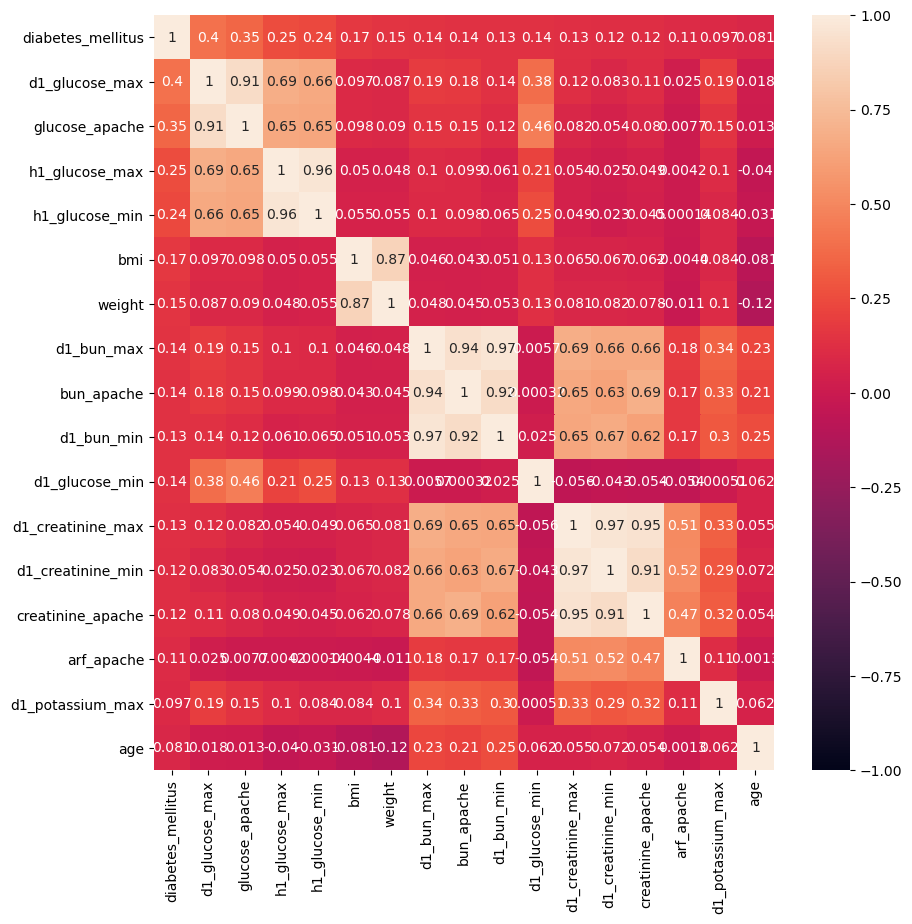

In [197]:
#plt.figure(figsize=(10,10),dpi=100)
#sns.heatmap(df_fillna.corr(),annot=True,vmin=-1,vmax=1)

In [143]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
X = df_fillna.iloc[:,3:]
drop_list = []

for i, val in enumerate(range(0,30)):
    print("iteration:",i)
    
    calculated = calc_vif(X)
    max_VIF = calculated.iloc[calculated['VIF'].idxmax()]
    
    max_VIF_var = max_VIF[0]
    max_VIF_val = max_VIF[1]
    print("max VIF:",max_VIF_val)
    
    if max_VIF_val > 10:
        drop_list.append(max_VIF_var)
    
        X.drop(columns=max_VIF_var,axis=1,inplace=True)
    else:
        continue
print(drop_list)

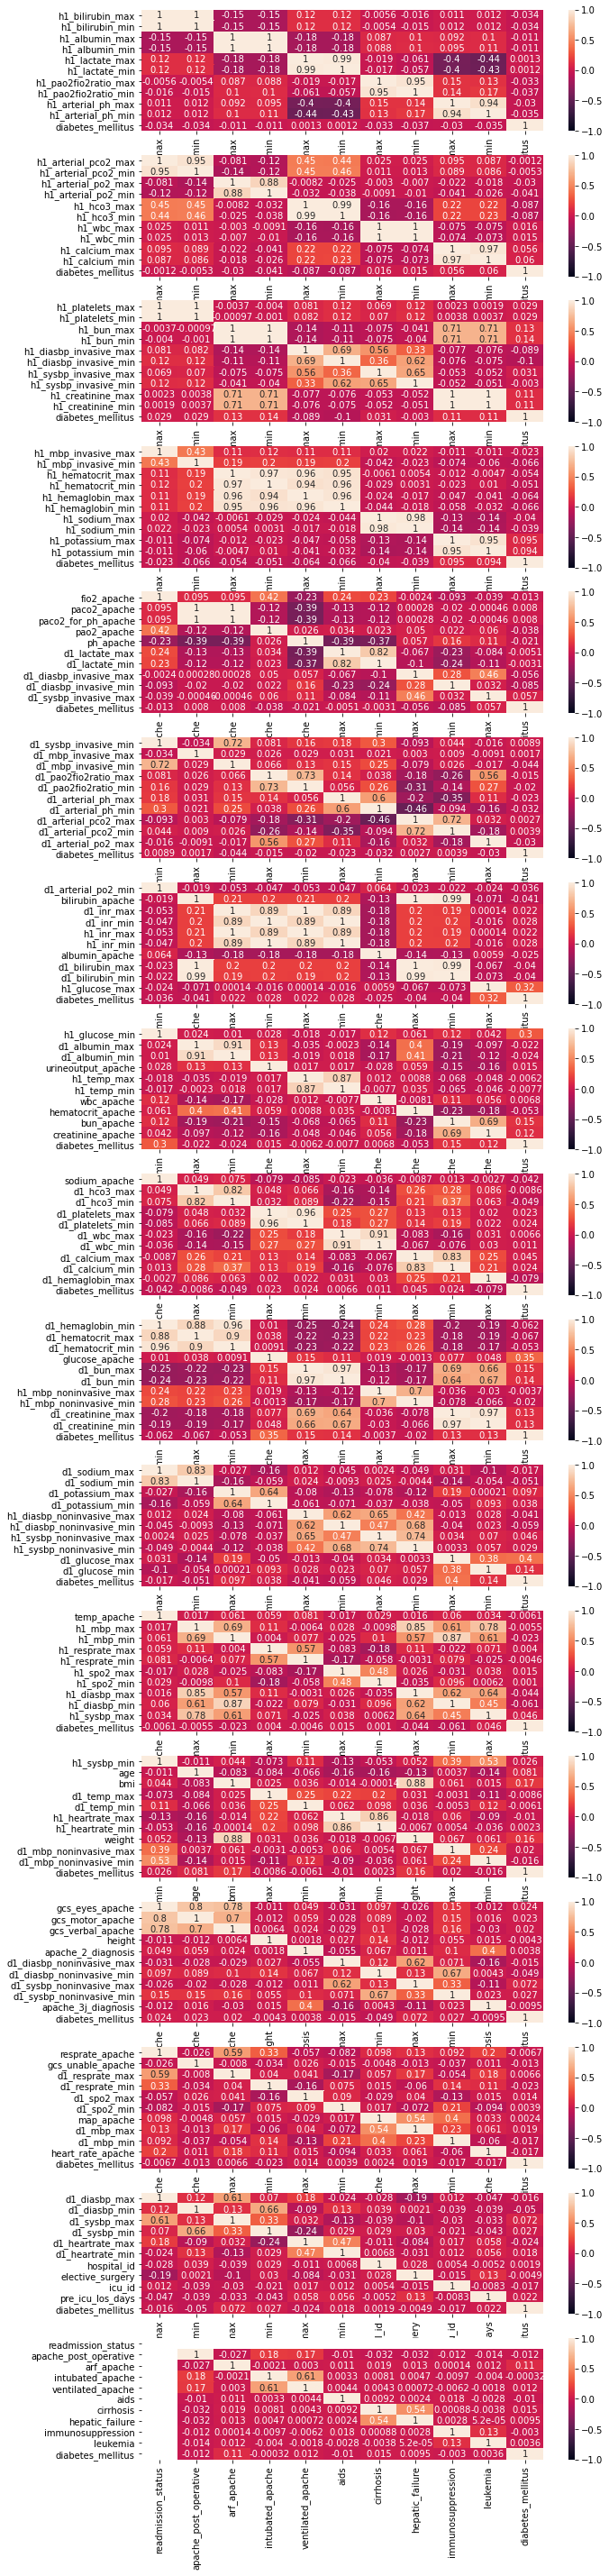

In [110]:
# ctr + /
# fig,ax = plt.subplots(nrows=17,ncols=1,figsize=(10,50))
# for i,val in enumerate(range(0,170,10)):
#     df = df_zort.iloc[:,list(range(val,val+10)) + [-1]]
#     sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,ax=ax[i])
# sns.heatmap(df_cont.corr(),annot=True,vmin=-1,vmax=1)